In [41]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/mohod/Developer/otsim/brownian_ot')
# %matplotlib inline
import analysis as ana
from brownian_ot import analysis as anb
from scipy.optimize import curve_fit

In [42]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path =  "/Users/mohod/Developer/otsim/data/"
    folders  = os.listdir(Path)
    # print(folders)
    for id in toFind:
        for folder in folders:
            # print(folder)
            if(folder[0] != "."):
                files=""
                try:
                    files = os.listdir(Path+folder+"/data/")
                # print(Path+folder+"/data/")
                except Exception:
                    # print("some")
                    pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    filetype = filename[-1].split(".")[1]
                    # print(uuid)
                    if uuid == id and filetype=="npy":
                        trajs.append([file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    return trajs

In [43]:
# getArrayRadius
def getArrayRadius(allTraj):
    ans = []
    sds = []
    # print(allTraj[1][1,:].shape)
    for traj in allTraj:
        # print(traj[0])
        radius, sd = ana.getRadius(traj[1])
        ans.append(radius)
        sds.append(sd)
    return ans,sds
def getArrayFrequency(allTraj):
    ans = []
    for traj in allTraj:
        ans.append(ana.getfreq(traj[1][:,0]))
    return np.abs(ans)
        

In [44]:
# modes = [-5,-4,-3,-2,-1,1,2,3,4,5]
# LCP_modeVar = getArrayTraj([3080017,4099843,3864095,6705893,2789572,2322232,5118391,1544562,6897390,5357862])
# RCP_modeVar = getArrayTraj([6491602,4061540,6244212,2548265,1762004,7167251,9785005,6558493,5600605,4317625])
# for i in range(len(modes)):
#     names = LCP_modeVar[i][0].split("_")
#     names.insert(1,str(modes[i]))
#     name = names[0]
#     for i in range(1,len(names)):
#         name+="_"+names[i]
#     print(name)
#     np.save("/Users/mohod/Developer/OTsim/OtSim_analysis/analysisFiles/modeVarData/"+name,LCP_modeVar[i][1])
    
# for i in range(len(modes)):
#     names = RCP_modeVar[i][0].split("_")
#     names.insert(1,str(modes[i]))
#     name = names[0]
#     for i in range(1,len(names)):
#         name+="_"+names[i]
#     print(name)
#     np.save("/Users/mohod/Developer/OTsim/OtSim_analysis/analysisFiles/modeVarData/"+name,RCP_modeVar[i][1])
    

RCP_0.03_4649125.npy
RCP_0.03_9528203.npy
RCP_0.03_7332875.npy
RCP_0.03_8074157.npy
RCP_0.03_4723858.npy
RCP_0.03_7167251.npy
RCP_0.03_5728550.npy
RCP_0.03_1432530.npy
RCP_0.03_5600605.npy
RCP_0.03_4317625.npy
10 10


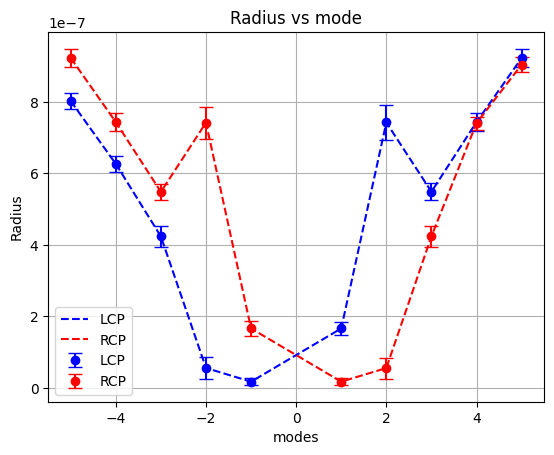

In [45]:
modes = [-5,-4,-3,-2,-1,1,2,3,4,5]
LCP_modeVar = getArrayTraj([6289987, 8741337, 1036851, 5808187,9714675, 2322232, 4847439, 5488811, 6897390, 7512004])
RCP_modeVar = getArrayTraj([4649125, 9528203, 7332875, 8074157,4723858, 7167251, 5728550, 1432530, 5600605, 4317625])
for i in RCP_modeVar:
    print(i[0])
print(len(LCP_modeVar),len(RCP_modeVar))

lcp_radius,lcp_sd = getArrayRadius(LCP_modeVar)
rcp_radius,rcp_sd = getArrayRadius(RCP_modeVar)

plt.errorbar(modes,lcp_radius,fmt="o", label ="LCP", color="blue" ,yerr=lcp_sd,capsize=5)
plt.errorbar(modes,rcp_radius, fmt="o",label ="RCP",color="red", yerr=rcp_sd,capsize=5)
plt.plot(modes,lcp_radius,"--", label ="LCP",color="blue")
plt.plot(modes,rcp_radius,"--", label ="RCP",color="red")
plt.legend()
plt.title("Radius vs mode")
plt.ylabel("Radius")
plt.xlabel("modes")
plt.grid()


#index radiLCP sdLCP radiRCP sdRCP
data=[]
for i in range(len(modes)):
      data.append(
            [modes[i],
            lcp_radius[i],
            lcp_sd[i],
            rcp_radius[i],
            rcp_sd[i]]
      )
data = np.array(data)
np.save("modeVSradius_dimer.npy",data)
plt.savefig("modeVSradius_dimer.png")


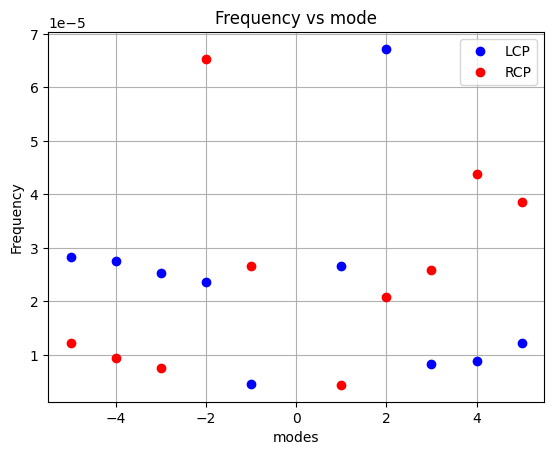

In [46]:
lcp_freq = getArrayFrequency(LCP_modeVar)*2*np.pi*lcp_radius
rcp_freq = getArrayFrequency(RCP_modeVar)*2*np.pi*rcp_radius
plt.plot(modes,lcp_freq,"o", label ="LCP",color="blue")
plt.plot(modes,rcp_freq,"o", label ="RCP",color="red")
plt.legend()
plt.title("Frequency vs mode")
plt.ylabel("Frequency")
plt.xlabel("modes")
plt.grid()

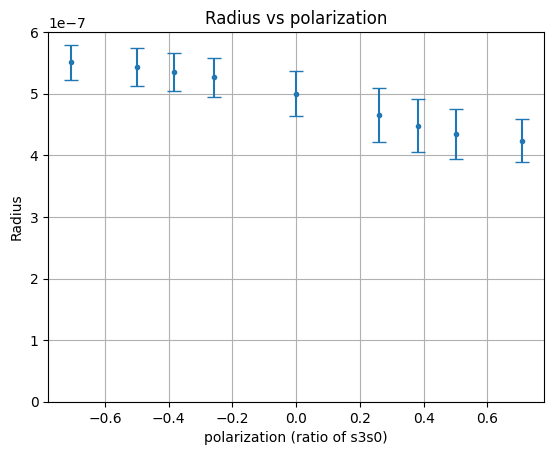

In [47]:


# polVar_2 = getArrayTraj([3639023,4297359,9225808,6772014,2168121,5547500,1048482,6942814,4186746]) # mode 3
polVar_2 = getArrayTraj([3639023,4297359,9225808,6772014,2168121,5547500,1048482,6942814,4186746]) # mode2
real_2 = np.ones(len(polVar_2))
im_2 =np.array([-90,-60,-45,-30,0,30,45,60,90])
im_2 =  np.exp(-1j*im_2*(np.pi/180)) 
phi_2 = np.angle(real_2+im_2)
s3s0_2 = np.sin(-1*phi_2)



radius_2,sd_2 = getArrayRadius(polVar_2)


plt.errorbar(s3s0_2,radius_2,fmt="." ,yerr=sd_2,capsize=5)
# plt.plot(s3s0_2,radius_2,"o")
plt.title("Radius vs polarization")
plt.ylabel("Radius")
plt.xlabel("polarization (ratio of s3s0)")
plt.grid()
plt.ylim(0,6e-7)

#index s3s0_ratio radius sd angle_real angle_im
data=[]
for i in range(len(s3s0_2)):
      data.append(
            [s3s0_2[i],
            radius_2[i],
            sd_2[i],
            real_2[i],
            im_2[i]]
      )
data = np.array(data)
# np.save("polarizationVSradius_dimer.npy",data)
plt.savefig("polarizationVSradius_dimer.png")


In [48]:
def gaussian(x, amp, mean, std):
    return amp * np.exp(-(x - mean)**2 / (2 * std**2))

def getplotfreq(traj):
    traj = traj[:-1]
    N= len(traj)
    sampling_frequency = 1e-5  # samples per second
    signal = traj 
    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(N,sampling_frequency)
    testFFT_mag = np.abs(fft_result)/N
    pos = np.argmax(testFFT_mag)
    # print(pos)
    width =int(100)
    print(np.argmax(testFFT_mag))
    print(frequencies[pos], np.abs(testFFT_mag[pos]))
    # print(frequencies[pos-1], np.abs(testFFT_mag[pos-1]))
    # print(frequencies[pos+1], np.abs(testFFT_mag[pos+1]))
    x =[]
    y =[]
    for i in range(len(frequencies)):
        if i > pos-width and i < pos+width:
            x.append(float(frequencies[i]))
            y.append(float(testFFT_mag[i]))
            # print(float(frequencies[i]),float(np.abs(testFFT_mag[i])))

    yave = np.sqrt(np.average(np.square(y))  )  

    try:
        popt, pcov = curve_fit(gaussian, x, y, p0=[yave, frequencies[pos], yave/2]) 
        print(popt)
        return testFFT_mag[pos], popt[2]
        # plt.figure(figsize=(30,5))
        # plt.scatter(x,y)
        # plt.plot(x, gaussian(x, *popt), 'r-')
        # plt.xlabel("Frequency (Hz)")
        # plt.ylabel("Magnitude")
        # plt.title("FFT of Signal")

        # plt.grid()
        # plt.show()
    except: 
        return testFFT_mag[pos], 0

def getArrayFrequencycc(allTraj):
    ans = []
    asd = []
    for traj in allTraj:
        f,sd = getplotfreq(traj[1][:,0])
        ans.append(f)
        asd.append(sd)   
    return np.abs(ans), asd

119
11.9 9.801011282160003e-08
[9.80101132e-08 1.19000000e+01 8.77102661e-09]
60
12.0 1.291290096771118e-07


/var/folders/36/551dxyms2s3805njq2pkv5f80000gn/T/ipykernel_28313/3724397296.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(gaussian, x, y, p0=[yave, frequencies[pos], yave/2])


[1.29129007e-07 1.20000000e+01 1.01175741e-08]
499942
-11.600000000000001 1.0010383005023654e-07
[ 1.00103829e-07 -1.16000000e+01  1.04302494e-08]
55
11.0 9.145013515910594e-08
[9.14501375e-08 1.10000000e+01 1.04218690e-08]
52
10.4 8.708928272202654e-08
[8.70892829e-08 1.04000000e+01 1.03266516e-08]
50
10.0 7.661183883940141e-08
[7.66118386e-08 1.00000000e+01 9.82941369e-09]
48
9.600000000000001 7.957315385874558e-08
[7.95731534e-08 9.60000000e+00 9.32536618e-09]
59
11.8 8.325388459820585e-08
[8.32538846e-08 1.18000000e+01 8.40123468e-09]
74
14.8 6.501576733167283e-08
[6.50157673e-08 1.48000000e+01 6.78434197e-09]


/var/folders/36/551dxyms2s3805njq2pkv5f80000gn/T/ipykernel_28313/2641646368.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


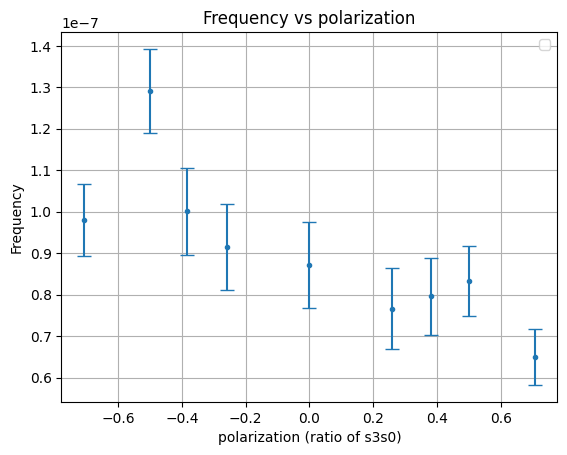

In [49]:

# polVar_2 = getArrayTraj([3639023,4297359,9225808,6772014,2168121,5547500,1048482,6942814,4186746]) # mode 3
polVar_2 = getArrayTraj([2966653,1819638,2698496,6544515,2380057,7005554,7188528,2682020,9505016]) # mode 2

real_2 = np.ones(len(polVar_2))
im_2 =np.array([-90,-60,-45,-30,0,30,45,60,90])
im_2 =  np.exp(-1j*im_2*(np.pi/180)) 
phi_2 = np.angle(real_2+im_2)
s3s0_2 = np.sin(-1*phi_2)




# radius_2,sd_2 = getArrayRadius(polVar_2)


pol_freq,sdsd = getArrayFrequencycc(polVar_2)
# plt.plot(s3s0_2,pol_freq,"o", label ="LCP",color="blue")
plt.errorbar(s3s0_2,pol_freq,fmt="." ,yerr=sdsd,capsize=5)
plt.legend()
plt.title("Frequency vs polarization")
plt.ylabel("Frequency")
plt.xlabel("polarization (ratio of s3s0)")
plt.grid()